### Gradients

Calculate the gradients for the following activations:

- Linear
- Rectified Linear Unit (aka RelU)
- Sigmoid

Also, refresh your knowledge of the chain rule so that you are able to differentiate functions of the form: f(g(h(x)), where f,g, and h are drawn from the functions given above.

**Linear**: $y = wx + b ⇒ \dfrac{\partial y}{\partial x_i} = w_i$

**ReLU**: $y = max(0, wx + b) ⇒ \dfrac{\partial y}{\partial x_i} = \begin{cases} w_i, wx + b > 0 \\ 0, wx + b <= 0 \end{cases}$

**Sigmoid**: $y = \dfrac{1}{1 + e^{-(wx + b)}} ⇒ \dfrac{\partial y}{\partial x_i} = \dfrac{e^{-(wx + b)} * w_i}{(1 + e^{-(wx + b)})^2}$

### Keras

1. Install Keras (or use CoCalc, which also has Keras and Tensorflow already installed).
2. Work through the introductory tutorial given here: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
3. Now experiment with different neural network architectures and build classifiers for the two datasets given below. For each dataset, the x is a 2 dimensional input and the y is the binary label “0” or “1”.

`from sklearn import datasets
(moon\_x,moon\_y) = datasets.make\_moons(n\_samples=10000, noise=0.05, random\_state=42)
(circle\_x,circle\_y) = datasets.make\_circles(n\_samples=10000, noise=0.025, random\_state=42)`

1. For each dataset, plot the data in 2 dimensions, and also show the decision boundaries of your network (for example, produce a visualization like: http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html).
2. Make note of your final accuracy on the training dataset, and the cross entropy score as well.

Bring your code to class, and save your figures in a format suitable for pasting into a google doc (eg. jpg or png).

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

from sklearn import datasets
from matplotlib import pyplot as plt

In [61]:
moon_x, moon_y = datasets.make_moons(n_samples=10000, noise=0.05, random_state=42)
circle_x, circle_y = datasets.make_circles(n_samples=10000, noise=0.025, random_state=42)

In [64]:
# model 1
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.fit(moon_x, moon_y, epochs=15, batch_size=10)

Epoch 1/15
10000/10000 [==============================] - 14s 1ms/step - loss: 0.4538 - acc: 0.7773
Epoch 2/15
10000/10000 [==============================] - 7s 674us/step - loss: 0.2461 - acc: 0.8853
Epoch 3/15
10000/10000 [==============================] - 10s 975us/step - loss: 0.2024 - acc: 0.9036
Epoch 4/15
10000/10000 [==============================] - 9s 863us/step - loss: 0.1730 - acc: 0.9172
Epoch 5/15
10000/10000 [==============================] - 13s 1ms/step - loss: 0.1448 - acc: 0.9325
Epoch 6/15
10000/10000 [==============================] - 12s 1ms/step - loss: 0.1151 - acc: 0.9523
Epoch 7/15
10000/10000 [==============================] - 13s 1ms/step - loss: 0.0810 - acc: 0.9752
Epoch 8/15
10000/10000 [==============================] - 13s 1ms/step - loss: 0.0559 - acc: 0.9909
Epoch 9/15
10000/10000 [==============================] - 11s 1ms/step - loss: 0.0386 - acc: 0.9977
Epoch 10/15
10000/10000 [==============================] - 10s 973us/step - loss: 0.0269 - acc: 

In [28]:
scores = model.evaluate(moon_x, moon_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 0s 22us/step

acc: 100.00%


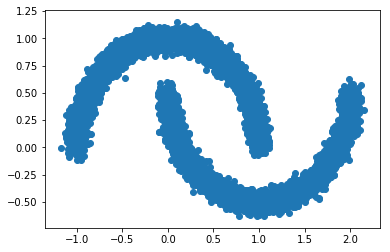

In [25]:
plt.scatter(moon_x[:, 0], moon_x[:, 1])
plt.show()

In [22]:
moon_x[:, 0]

array([ 0.37469348, -0.84234358,  0.43910037, ..., -0.00407283,
        0.86363672,  1.01028397])

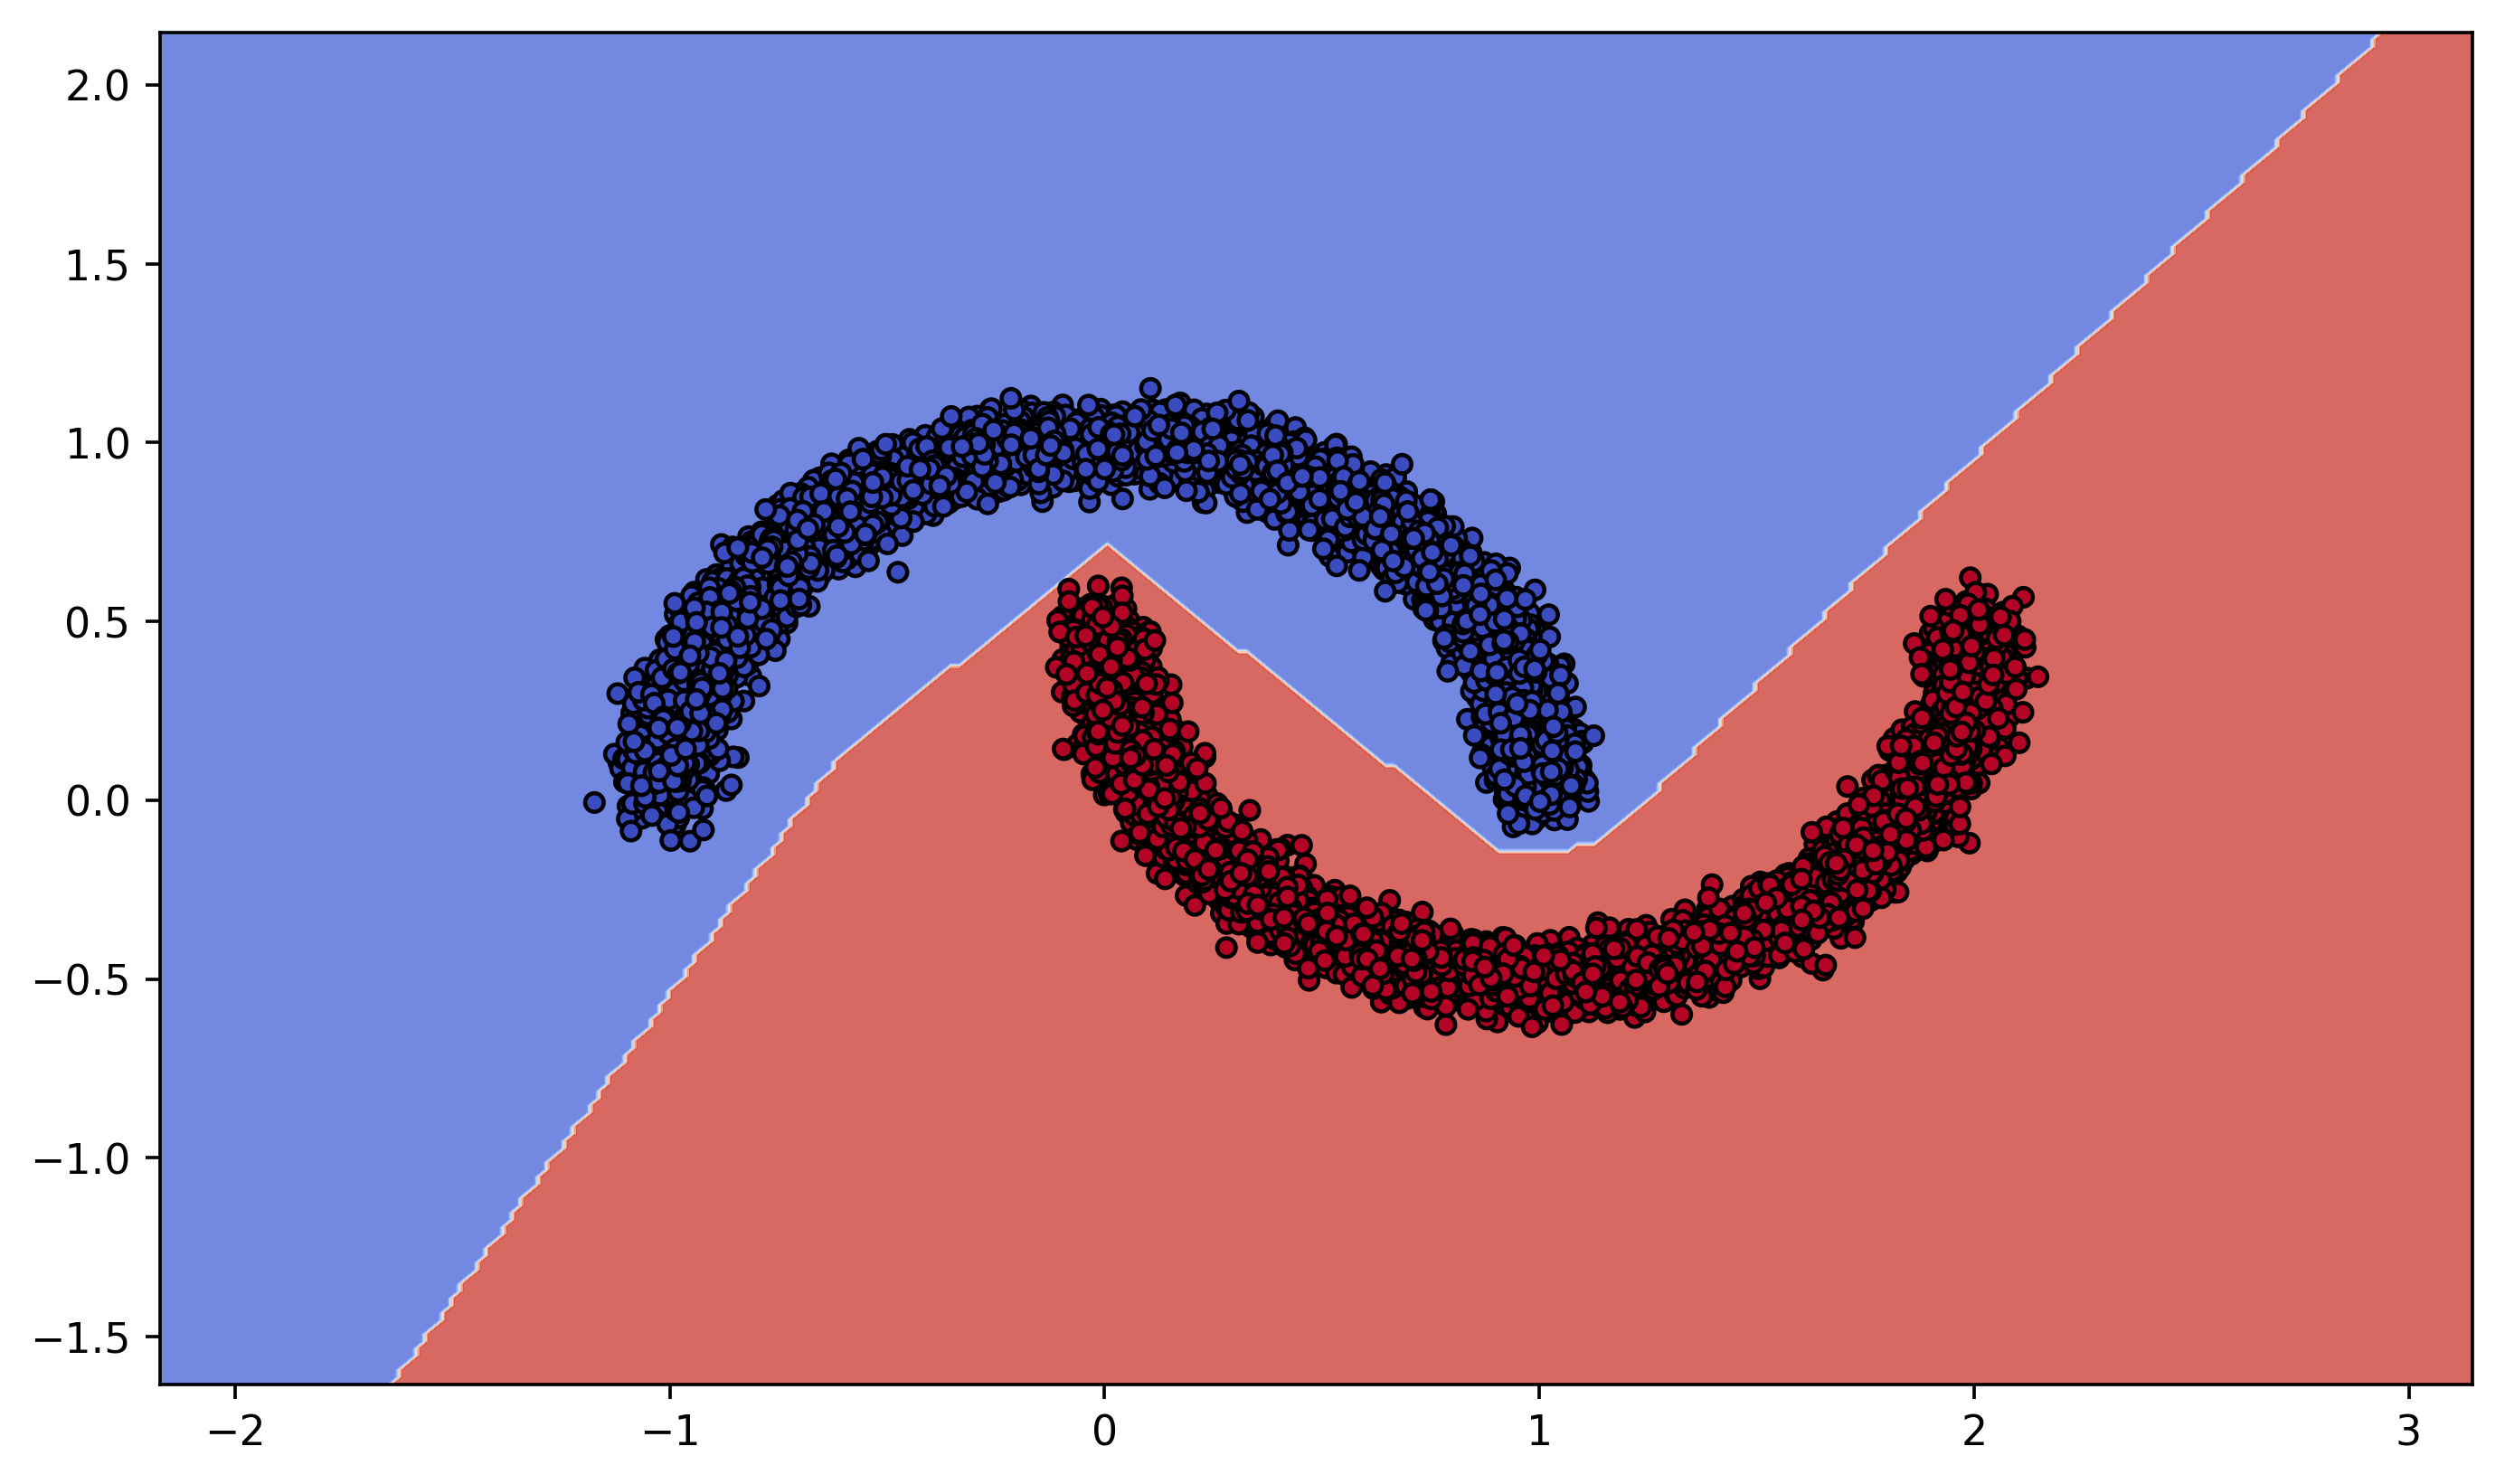

In [66]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict_classes(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

plt.figure(figsize=(10, 6), dpi=330)

X0, X1 = moon_x[:, 0], moon_x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=moon_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

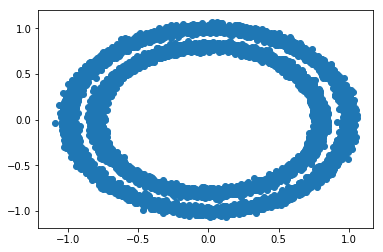

In [50]:
plt.scatter(circle_x[:, 0], circle_x[:, 1])
plt.show()

In [67]:
# model 2
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
model.fit(circle_x, circle_y, epochs=15, batch_size=10)

Epoch 1/15
10000/10000 [==============================] - 13s 1ms/step - loss: 0.6849 - acc: 0.5252
Epoch 2/15
10000/10000 [==============================] - 13s 1ms/step - loss: 0.6669 - acc: 0.6266
Epoch 3/15
10000/10000 [==============================] - 13s 1ms/step - loss: 0.6407 - acc: 0.8052
Epoch 4/15
10000/10000 [==============================] - 11s 1ms/step - loss: 0.6079 - acc: 0.8934
Epoch 5/15
10000/10000 [==============================] - 10s 986us/step - loss: 0.5701 - acc: 0.9496
Epoch 6/15
  220/10000 [..............................] - ETA: 13s - loss: 0.5476 - acc: 0.9636

/usr/local/lib/python3.6/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176456). Check your callbacks.
  % delta_t_median)


10000/10000 [==============================] - 12s 1ms/step - loss: 0.5284 - acc: 0.9762
Epoch 7/15
10000/10000 [==============================] - 10s 1ms/step - loss: 0.4849 - acc: 0.9883
Epoch 8/15
10000/10000 [==============================] - 11s 1ms/step - loss: 0.4411 - acc: 0.9936
Epoch 9/15
10000/10000 [==============================] - 12s 1ms/step - loss: 0.3980 - acc: 0.9947
Epoch 10/15
10000/10000 [==============================] - 10s 1ms/step - loss: 0.3570 - acc: 0.9959
Epoch 11/15
10000/10000 [==============================] - 12s 1ms/step - loss: 0.3191 - acc: 0.9968
Epoch 12/15
10000/10000 [==============================] - 10s 952us/step - loss: 0.2836 - acc: 0.9979
Epoch 13/15
10000/10000 [==============================] - 9s 922us/step - loss: 0.2507 - acc: 0.9983
Epoch 14/15
10000/10000 [==============================] - 10s 976us/step - loss: 0.2209 - acc: 0.9995
Epoch 15/15
10000/10000 [==============================] - 11s 1ms/step - loss: 0.1939 - acc: 0.9996


In [59]:
scores = model.evaluate(circle_x, circle_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 0s 29us/step

acc: 100.00%


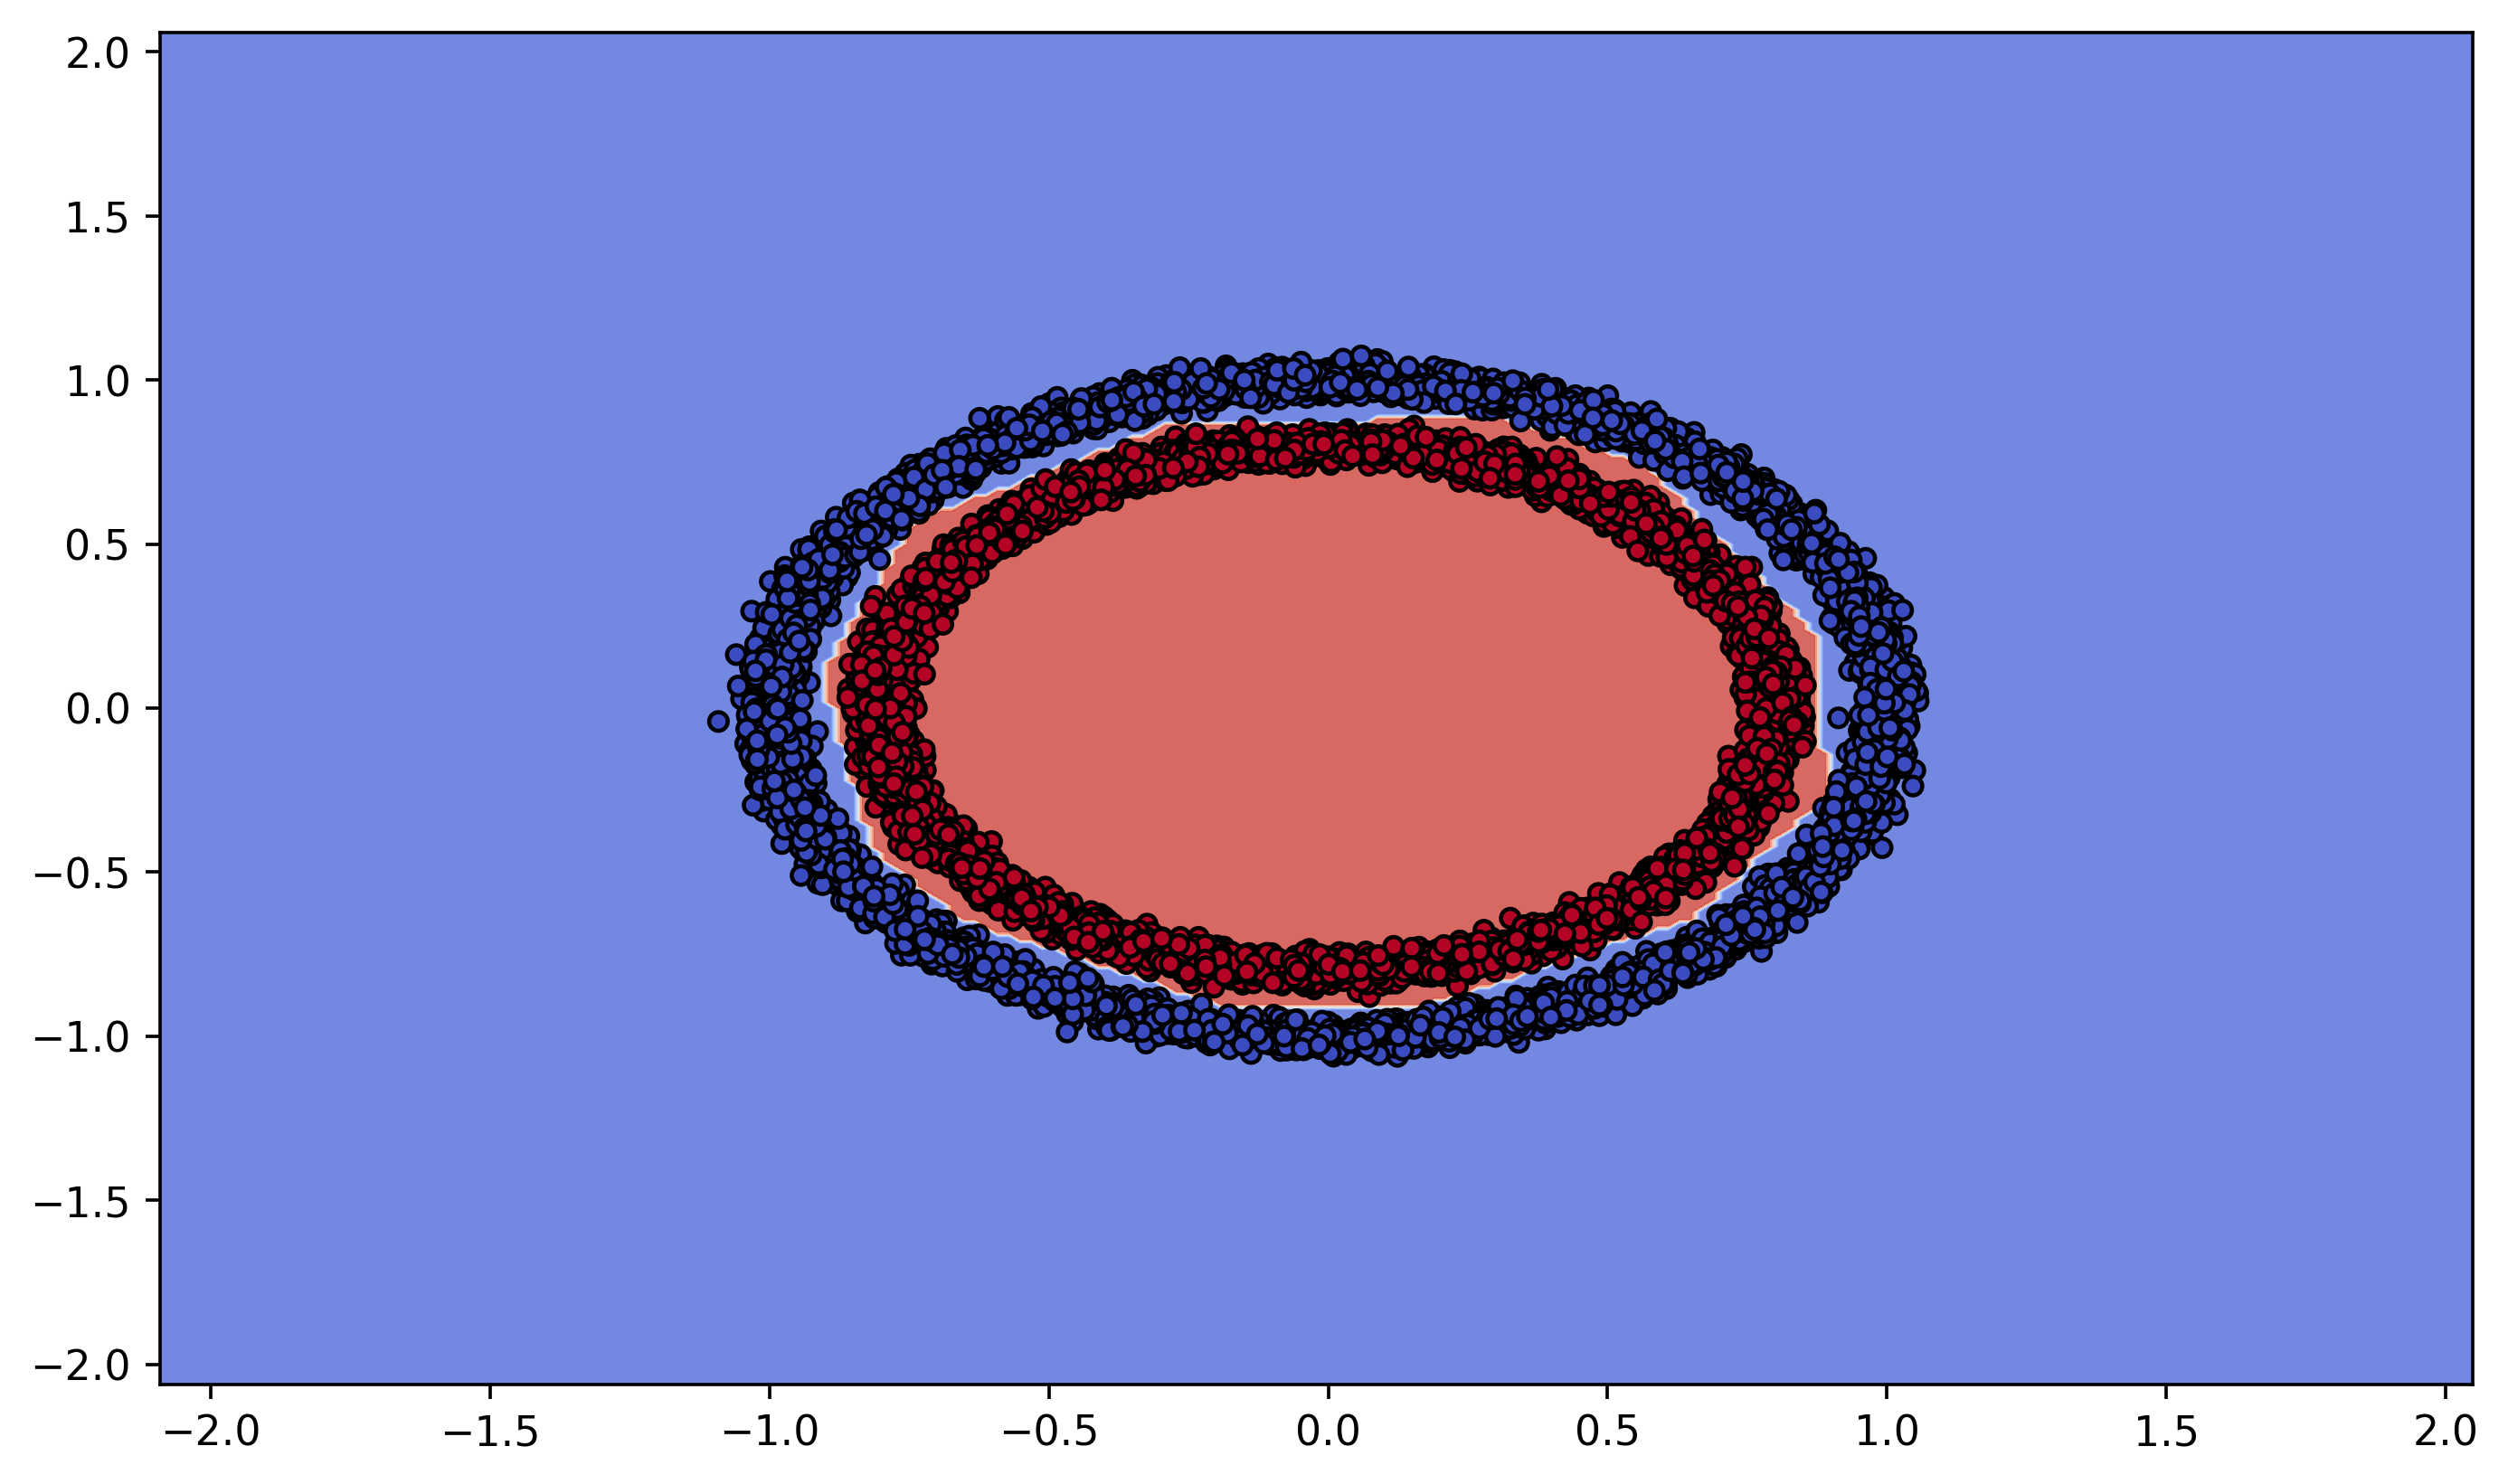

In [69]:
plt.figure(figsize=(10, 6), dpi=330)

X0, X1 = circle_x[:, 0], circle_x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=moon_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()